In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import statistics
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
import math
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/ My Drive/Colab_TA/Dataset.csv", usecols=["Tanggal", "Kurs Jual"] )
df['Tanggal']= pd.to_datetime(df.Tanggal)
df

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
...,...,...
2704,2021-12-27,16202.12
2705,2021-12-28,16174.64
2706,2021-12-29,16202.59
2707,2021-12-30,16182.85


In [4]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Tanggal,Kurs Jual
0,2011-01-03,11983.50
1,2011-01-04,12035.82
2,2011-01-05,11993.59
3,2011-01-06,11877.25
4,2011-01-07,11778.29
5,2011-01-10,11723.36
6,2011-01-11,11834.54
7,2011-01-12,11831.54
8,2011-01-13,11923.25
9,2011-01-14,12144.12


# Visualisasi Data

Text(0, 0.5, 'Kurs Jual')

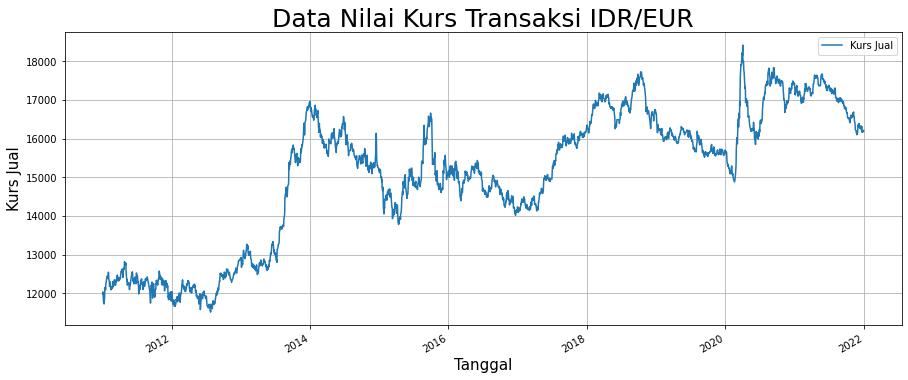

In [5]:
df.plot(x='Tanggal', y='Kurs Jual', grid='True', figsize=(15,6))
plt.title('Data Nilai Kurs Transaksi IDR/EUR', fontsize = 25)
plt.xlabel('Tanggal', fontsize = 15)
plt.ylabel('Kurs Jual', fontsize = 15)

### Visualisasi Data (Per Bulan) 

In [6]:
vis = px.line(df, x="Tanggal", y="Kurs Jual", title="Data Kurs Transaksi IDR/EUR")
vis.update_xaxes(dtick="M1", tickformat="%b\t%Y", ticklabelmode="period")
vis.update_layout(autosize=False, width=1600, height=850)
vis.show()

# Menentukan independent Variabel (X) and dependent Variabel (Y)

### Kurs Jual (Dataset ) 

In [7]:
Kurs_Jual = np.array(df['Kurs Jual'])
Kurs_Jual = Kurs_Jual.reshape(-1,1)
print(Kurs_Jual)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


### Menentukan X dan y 

In [8]:
#Menghapus kolom tabel tanggal
df.drop(['Tanggal'],axis=1,inplace=True)
df

,Kurs Jual
0,11983.50
1,12035.82
2,11993.59
3,11877.25
4,11778.29
5,11723.36
6,11834.54
7,11831.54
8,11923.25
9,12144.12


In [16]:
#Menentukan VariabeL untuk memprediksi 40 hari ke depan
prediction_future = 40
#Membuat variabel dependent atau target prediksi (kolom)  
df['Variabel Dependent (y)'] = df['Kurs Jual'].shift(prediction_future).fillna(pd.Series(reversed(df['Kurs Jual'])))
df

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


In [17]:
pd.set_option('display.max_rows', None)
df.head(2709)

,Kurs Jual,Variabel Dependent (y)
0,11983.50,16208.90
1,12035.82,16182.85
2,11993.59,16202.59
3,11877.25,16174.64
4,11778.29,16202.12
5,11723.36,16202.77
6,11834.54,16161.64
7,11831.54,16298.33
8,11923.25,16294.71
9,12144.12,16317.46


### Variabel Independent (x) 

In [18]:
#Membuat (mengambil hanya kolom kurs Jual ) Variabel Independent (X)
X = np.array(df.drop(['Variabel Dependent (y)'], axis=1))
print(X)

[[11983.5 ]
 [12035.82]
 [11993.59]
 ...
 [16202.59]
 [16182.85]
 [16208.9 ]]


In [19]:
X.shape

(2709, 1)

### Variabel Independent (y)

In [20]:
#Membuat (mengambil hanya kolom variabel dependent (y))
y = np.array(df['Variabel Dependent (y)'])
y=y.reshape(-1,1)
print(y)

[[16208.9 ]
 [16182.85]
 [16202.59]
 ...
 [16608.28]
 [16653.43]
 [16636.19]]


In [21]:
y.shape

(2709, 1)

### 40 hari Data Terakhir

In [23]:
#Membuat variabel prediction_days_array yang sama dengan 40 baris terakhir dari kumpulan dataset asli
actual_40days_array = np.array(df.drop(['Variabel Dependent (y)'],axis = 1))[-prediction_future:]
                                 
print(actual_40days_array)

[[16686.42]
 [16594.92]
 [16575.67]
 [16563.15]
 [16470.28]
 [16395.51]
 [16344.34]
 [16245.84]
 [16219.03]
 [16210.07]
 [16201.16]
 [16144.28]
 [16164.97]
 [16097.55]
 [16110.88]
 [16148.2 ]
 [16256.4 ]
 [16338.78]
 [16320.18]
 [16363.06]
 [16347.97]
 [16388.32]
 [16317.56]
 [16275.56]
 [16330.89]
 [16308.15]
 [16257.43]
 [16272.68]
 [16247.24]
 [16317.46]
 [16317.46]
 [16294.71]
 [16298.33]
 [16161.64]
 [16202.77]
 [16202.12]
 [16174.64]
 [16202.59]
 [16182.85]
 [16208.9 ]]


# Normalisasi Data

### Kurs Jual (Dataset) 

In [24]:
sc_KursJual = MinMaxScaler()
KursJual_scale = sc_KursJual.fit_transform(Kurs_Jual)
print(KursJual_scale)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel X 

In [25]:
scalerX =MinMaxScaler()
scalerX.fit(X)
X = scalerX.transform(X)
print(X)

[[0.06814606]
 [0.07572509]
 [0.06960769]
 ...
 [0.67931963]
 [0.67646011]
 [0.68023369]]


### Variabel Y 

In [26]:
scalerY= MinMaxScaler()
scalerY.fit(y)
Y=scalerY.transform(y)
print(Y)

[[0.68023369]
 [0.67646011]
 [0.67931963]
 ...
 [0.73808751]
 [0.7446279 ]
 [0.74213053]]


### 40 Hari Data Terakhir 

In [28]:
sc_ActualArray = MinMaxScaler()
Actual40_scale = sc_ActualArray.fit_transform(actual_40days_array)
print(Actual40_scale)

[[1.        ]
 [0.84461766]
 [0.81192793]
 [0.79066687]
 [0.63295804]
 [0.50598604]
 [0.4190908 ]
 [0.25182128]
 [0.20629341]
 [0.19107783]
 [0.17594715]
 [0.07935538]
 [0.11449046]
 [0.        ]
 [0.02263658]
 [0.08601219]
 [0.26975394]
 [0.40964899]
 [0.37806307]
 [0.4508805 ]
 [0.42525515]
 [0.49377622]
 [0.37361387]
 [0.30229083]
 [0.39625045]
 [0.35763411]
 [0.27150305]
 [0.29740011]
 [0.25419872]
 [0.37344405]
 [0.37344405]
 [0.33481074]
 [0.34095811]
 [0.10883557]
 [0.1786812 ]
 [0.17757739]
 [0.13091175]
 [0.17837553]
 [0.1448537 ]
 [0.18909097]]


# Data Spliting

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1896, 1) (1896, 1)
(813, 1) (813, 1)


# Parameter Tuning

In [31]:
#Parameter dan kernel yang akan di uji
parameters_kernel = {'C': [0.1, 1, 10, 100],
                     'gamma' :[1, 0.1, 0.01, 0.001,],
                     'epsilon': [1e-4, 1e-3],
                     'kernel' :['rbf', 'poly', 'linear']}
#Mengukur score parameter tuning dengan rmse
def rmse(actual, predict):# penerapan sklearn.metrics
    prediksi = np.array(predict)
    aktual = np.array(actual)
    distance = prediksi - aktual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score
rmse_score = make_scorer(rmse, greater_is_better=False)
model = SVR()
grid_search = GridSearchCV(SVR(),parameters_kernel,cv = 5, scoring=rmse_score, refit = True, verbose =3)
grid_search.fit(x_train,np.ravel(y_train))#penerapan scoring parameter sklearn.model_selection.cross_val_score

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.105 total time=   0.2s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.104 total time=   0.2s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.122 total time=   0.2s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.120 total time=   0.2s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=rbf;, score=-0.117 total time=   0.2s
[CV 1/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.153 total time=   0.1s
[CV 2/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.162 total time=   0.1s
[CV 3/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.162 total time=   0.1s
[CV 4/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.156 total time=   0.1s
[CV 5/5] END C=0.1, epsilon=0.0001, gamma=1, kernel=poly;, score=-0.155 total time=   0.1s
[CV 1/5] END C=0.1, epsilon=0.000

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.0001, 0.001],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=3)

In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'epsilon': 0.0001, 'gamma': 1, 'kernel': 'rbf'}
-0.11364778723430695


# Model SVR

In [34]:
model40_svr = SVR(kernel='rbf', C=1 ,epsilon=0.0001, gamma=1)
model40_svr.fit(x_train,np.ravel(y_train))

SVR(C=1, epsilon=0.0001, gamma=1)

# Evaluasi Model

In [35]:
y_pred_test= model40_svr.predict(x_test)
y_pred_train = model40_svr.predict(x_train)

In [36]:
print('MSE  Train : {0:.5f}'.format(mean_squared_error(y_train, y_pred_train)))
print('RMSE  Train : {0:.5f}'.format(math.sqrt(mean_squared_error(y_train, y_pred_train))))
print('R^2 Train : {0:.5f}'.format(r2_score(y_train, y_pred_train)))

MSE  Train : 0.01298
RMSE  Train : 0.11395
R^2 Train : 0.80101


In [37]:
print('MSE  Test : {0:.5f}'.format(mean_squared_error(y_test, y_pred_test)))
print('RMSE Test : {0:.5f}'.format(math.sqrt(mean_squared_error(y_test, y_pred_test))))
print('R^2 Test: {0:.5f}'.format(r2_score(y_test, y_pred_test)))

MSE  Test : 0.01233
RMSE Test : 0.11105
R^2 Test: 0.80172


# Visualisasi Hasil

In [38]:
#Convert 1d array y to 2d
y_pred_test2d = y_pred_test.reshape(-1,1)
y_test2d = y_test.reshape(-1,1)

### Plot Prediksi VS Aktual (Test)

In [39]:
nilai_PrediksiTest = scalerX.inverse_transform(y_pred_test2d)
print(nilai_PrediksiTest)

[[12393.45075172]
 [16130.05289445]
 [16341.54900616]
 [12125.37230395]
 [16526.9776605 ]
 [12626.61743636]
 [16791.63541281]
 [15243.34218813]
 [14041.03275117]
 [15591.48502326]
 [16860.15908369]
 [12044.09289218]
 [16375.27555703]
 [16060.42092481]
 [14915.96671579]
 [15297.09746664]
 [16744.40606321]
 [16114.43338398]
 [12250.17844382]
 [14609.56537793]
 [14883.88433885]
 [16129.9791218 ]
 [16545.65334914]
 [16108.83400755]
 [16740.22324118]
 [15729.91618722]
 [15693.17312139]
 [15213.49496194]
 [17039.93511748]
 [15365.67914461]
 [16206.85562604]
 [16328.31666226]
 [16696.76805694]
 [12296.05246243]
 [12083.12934623]
 [16563.46133014]
 [16041.94520066]
 [15119.22060747]
 [15693.70386555]
 [16125.01428388]
 [16848.40760144]
 [14918.78281499]
 [14357.36927984]
 [12354.0733964 ]
 [16064.27418451]
 [12120.79843708]
 [16117.16492828]
 [16549.05017991]
 [14707.51011115]
 [12522.73927622]
 [12437.89510892]
 [15244.28872309]
 [14165.59615765]
 [15663.35979183]
 [16014.60426319]
 [16945.51

In [40]:
nilai_test = scalerX.inverse_transform(y_test2d)
print(nilai_test)

[[11713.87]
 [16069.79]
 [17026.89]
 [12262.71]
 [15286.61]
 [12779.86]
 [16803.23]
 [15053.92]
 [14484.7 ]
 [14559.12]
 [17283.77]
 [12231.92]
 [16517.39]
 [16729.83]
 [15284.68]
 [14561.96]
 [17138.49]
 [16803.39]
 [11983.5 ]
 [14143.71]
 [14793.61]
 [17996.5 ]
 [16406.76]
 [16136.94]
 [16045.61]
 [15626.94]
 [16275.38]
 [15061.58]
 [17564.07]
 [14841.16]
 [14854.66]
 [16223.61]
 [17080.05]
 [12332.67]
 [12216.46]
 [15735.68]
 [16621.15]
 [15179.99]
 [15740.82]
 [16148.47]
 [15226.57]
 [14725.58]
 [14446.19]
 [12380.  ]
 [16696.09]
 [12413.64]
 [16584.71]
 [16967.78]
 [14240.32]
 [12960.61]
 [12720.84]
 [15259.93]
 [14997.16]
 [15619.79]
 [15658.84]
 [17472.41]
 [15608.7 ]
 [17055.97]
 [12148.01]
 [12265.62]
 [17442.85]
 [12393.18]
 [15467.14]
 [15850.46]
 [15109.48]
 [12566.62]
 [15255.18]
 [16008.8 ]
 [12553.97]
 [15613.17]
 [15421.45]
 [14092.22]
 [16434.51]
 [17492.03]
 [12141.76]
 [15294.26]
 [14971.95]
 [11765.54]
 [12182.3 ]
 [17549.4 ]
 [12029.12]
 [17267.62]
 [15040.67]
 [17

In [41]:
nilai_PrediksiTest.shape

(813, 1)

<function matplotlib.pyplot.show(*args, **kw)>

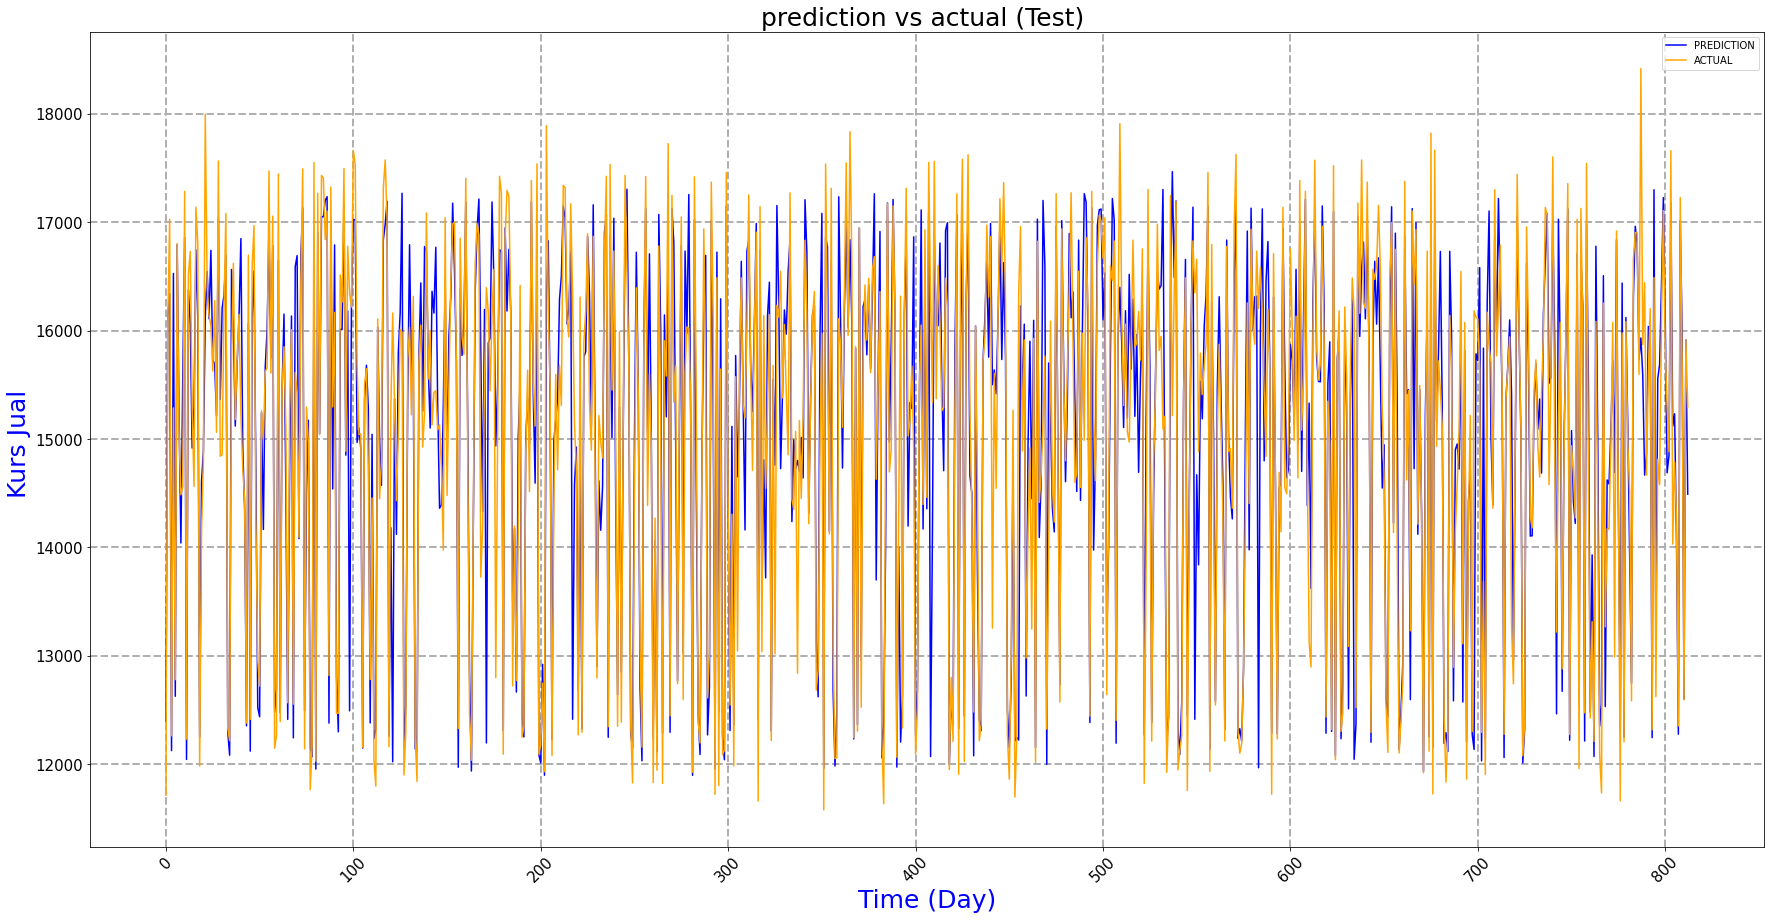

In [42]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest,label='PREDICTION', color='blue')
plt.plot(nilai_test,label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) ', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

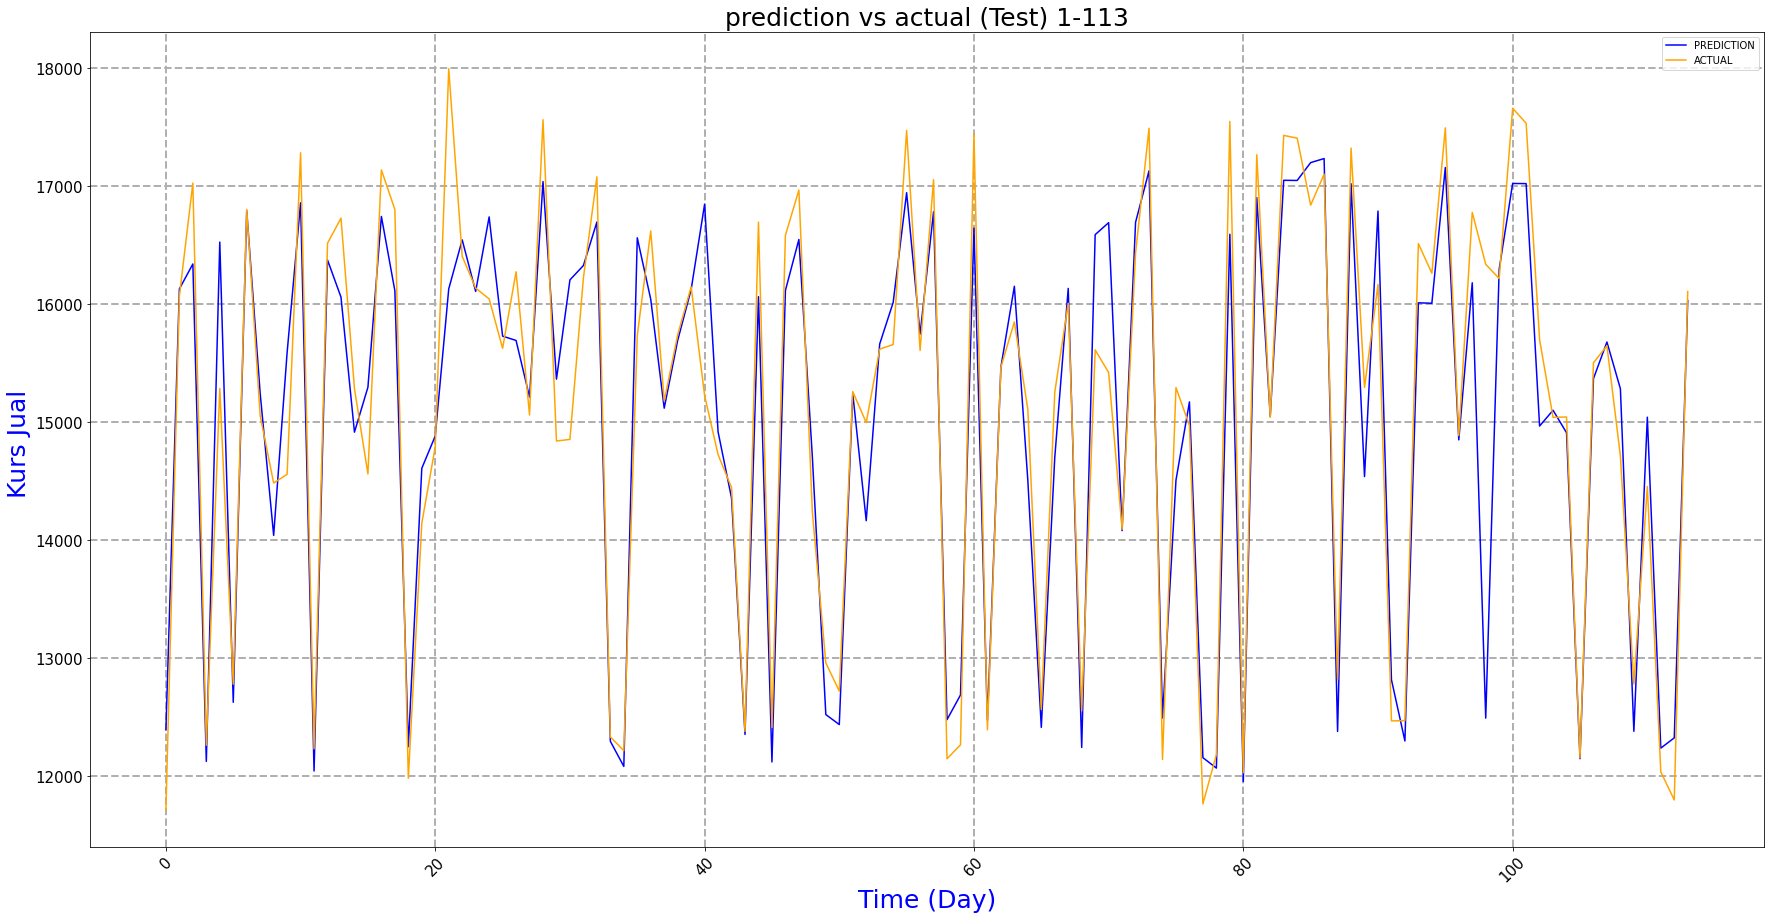

In [43]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[0:114],label='PREDICTION', color='blue')
plt.plot(nilai_test[0:114],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 1-113', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

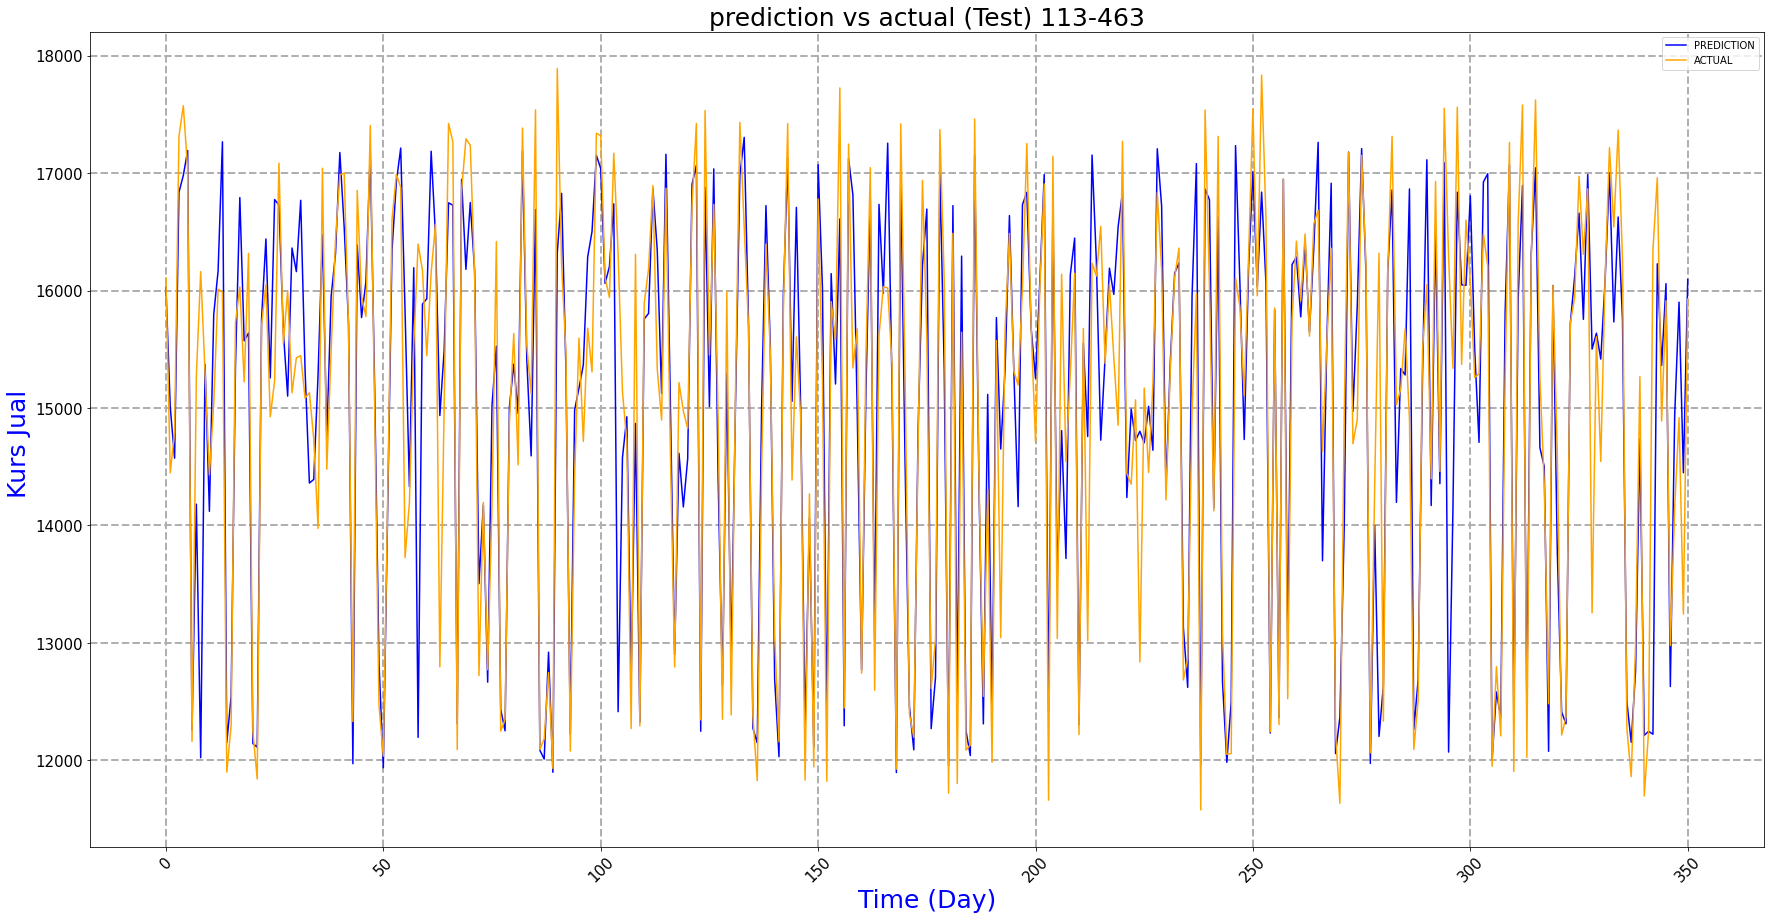

In [44]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[113:464],label='PREDICTION', color='blue')
plt.plot(nilai_test[113:464],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 113-463', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

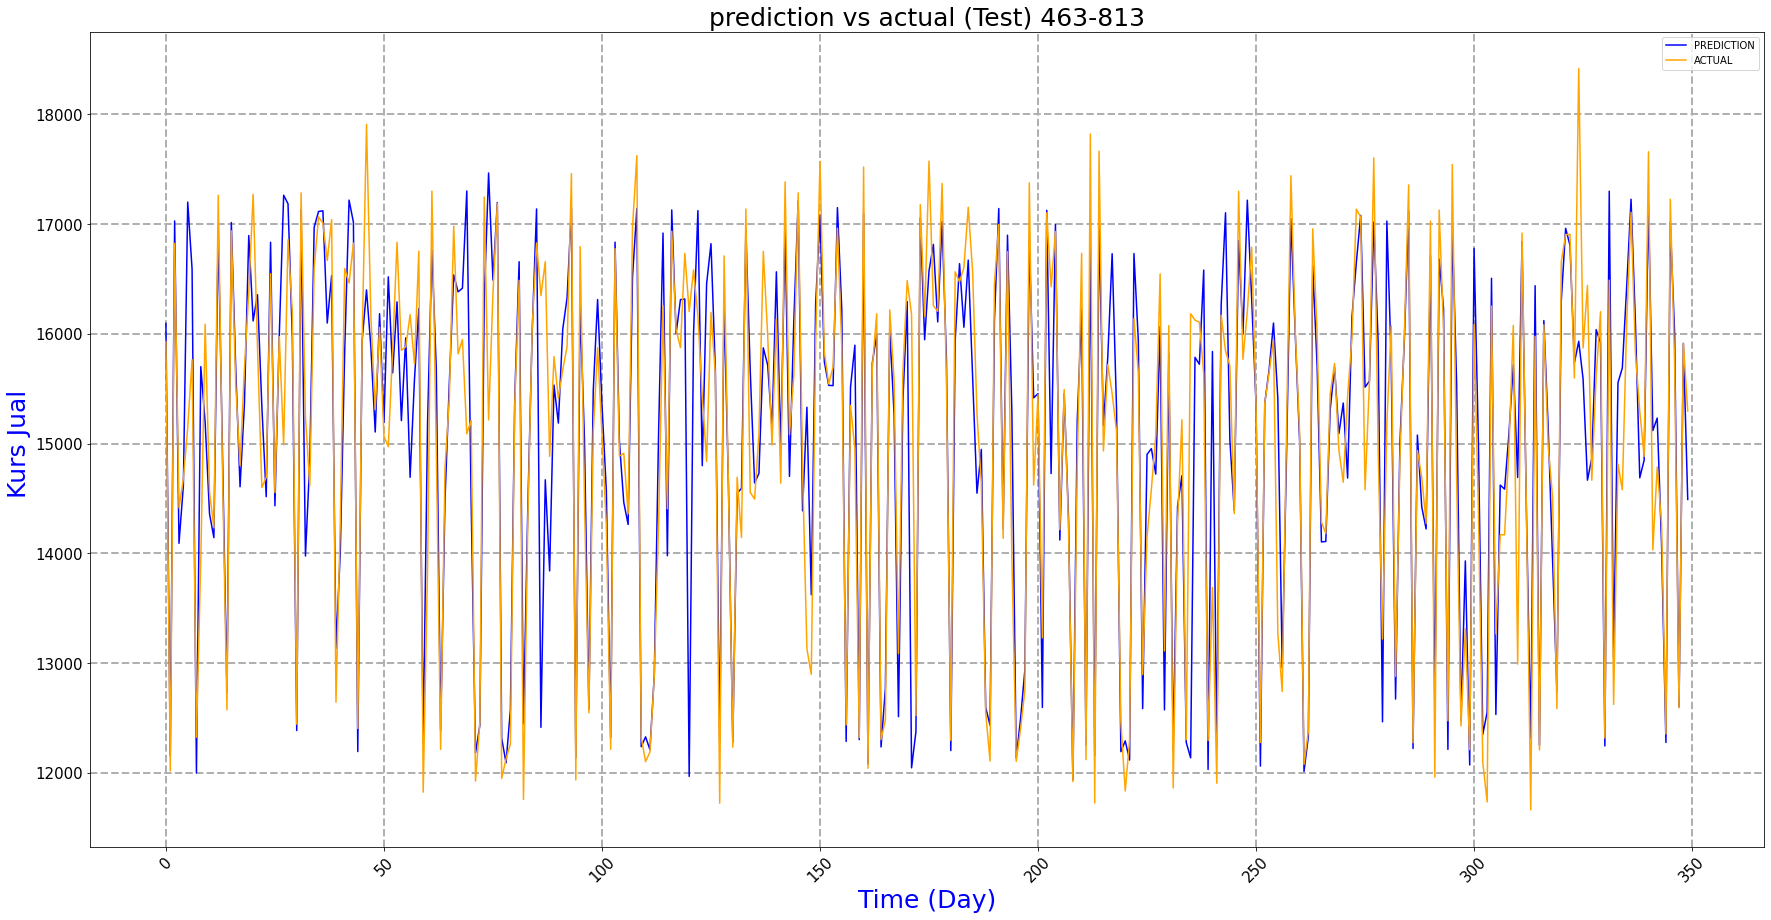

In [45]:
plt.figure(figsize=(30,15))
plt.plot(nilai_PrediksiTest[463:814],label='PREDICTION', color='blue')
plt.plot(nilai_test[463:814],label='ACTUAL', color='orange' )
plt.title('prediction vs actual (Test) 463-813', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

### Plot Prediksi VS Aktual (Dataset Kurs Jual)

In [46]:
Prediksi_Kurs = model40_svr.predict(KursJual_scale)
print(Prediksi_Kurs.reshape(-1,1))

[[0.08579426]
 [0.09029606]
 [0.0866502 ]
 ...
 [0.68821845]
 [0.68568239]
 [0.689026  ]]


In [47]:
NilaiPrediction_Kurs = scalerX.inverse_transform(Prediksi_Kurs.reshape(-1,1))
print(NilaiPrediction_Kurs)

[[12105.3300968 ]
 [12136.40720266]
 [12111.23886501]
 ...
 [16264.02092866]
 [16246.51379183]
 [16269.59559609]]


<function matplotlib.pyplot.show(*args, **kw)>

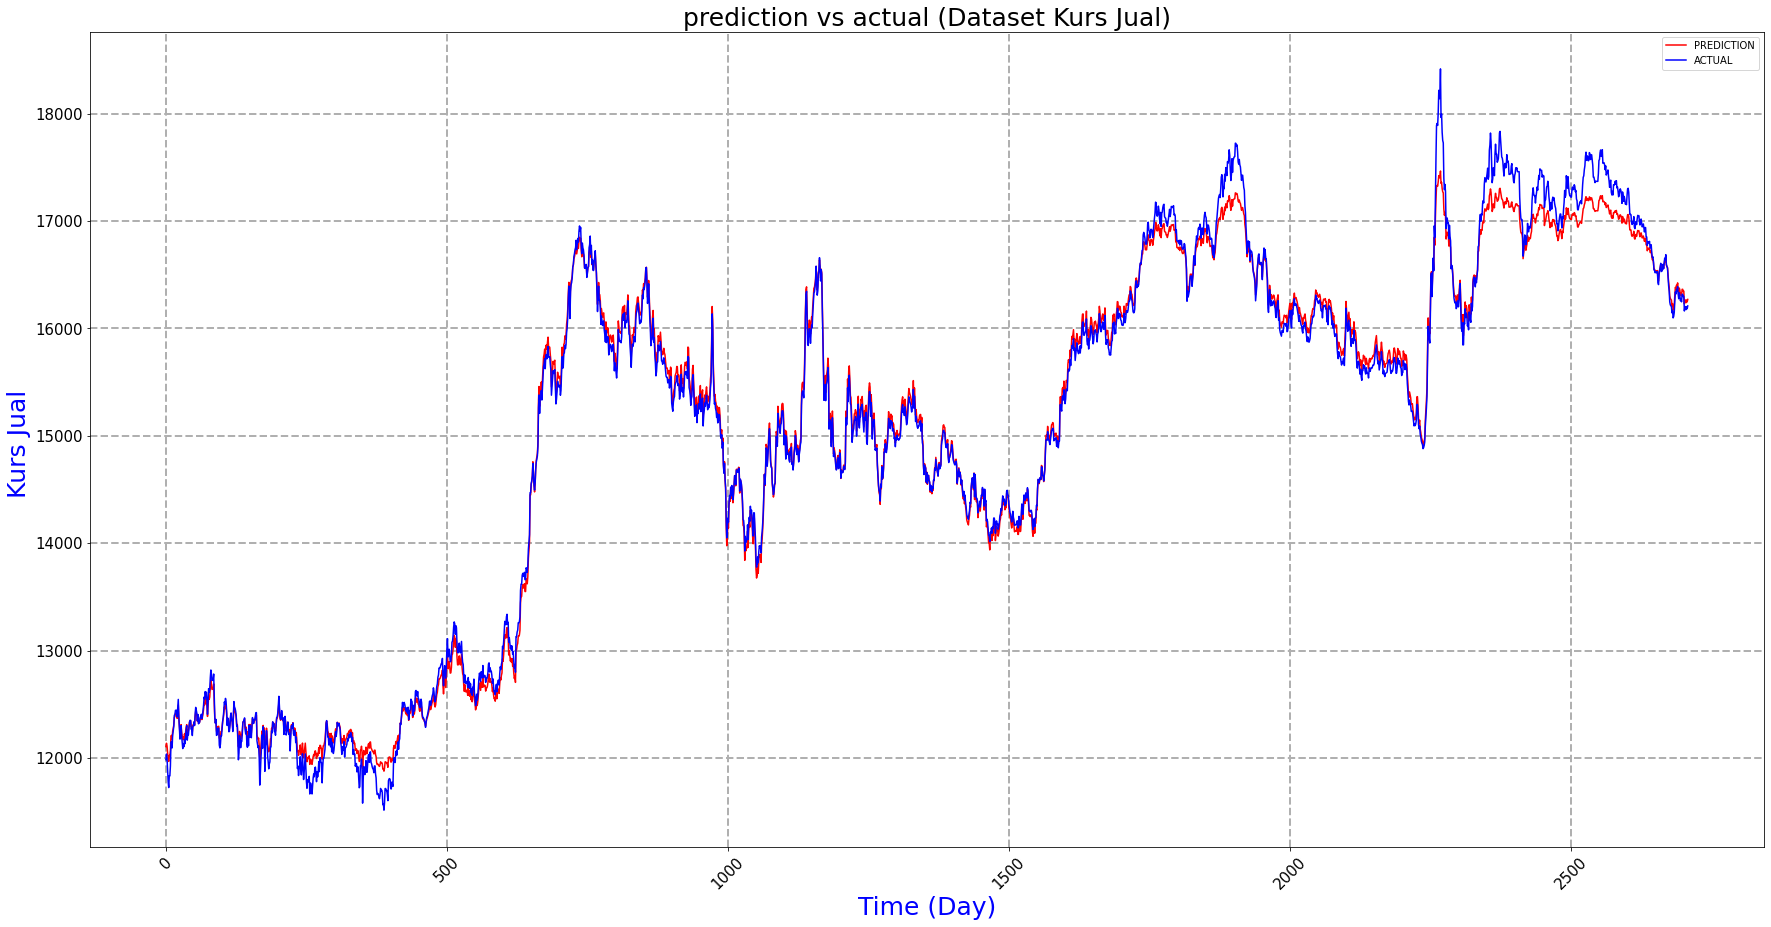

In [48]:
plt.figure(figsize=(30,15))
plt.plot(NilaiPrediction_Kurs,label='PREDICTION', color='red')
plt.plot(df['Kurs Jual'],label='ACTUAL', color='blue' )
plt.title('prediction vs actual (Dataset Kurs Jual)', fontsize= 25)
plt.ylabel('Kurs Jual ', fontsize = 25, color='blue')
plt.xlabel('Time (Day)', fontsize = 25, color='blue')
plt.legend()
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=0, fontsize=15)
plt.grid(linestyle='--', linewidth=2)
plt.show

In [49]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(KursJual_scale, Prediksi_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(KursJual_scale, Prediksi_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(KursJual_scale, Prediksi_Kurs)))

MSE  Prediksi : 0.00037
RMSE  Prediksi : 0.01920
R^2 Prediksi : 0.99427


In [50]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Kurs_Jual, NilaiPrediction_Kurs))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Kurs_Jual, NilaiPrediction_Kurs)))

MSE  Prediksi : 17559.45691
RMSE  Prediksi : 132.51210
R^2 Prediksi : 0.99427


#Prediksi 40 Hari

In [51]:
prediction_40days = model40_svr.predict(Actual40_scale)
prediction_40days = prediction_40days.reshape(-1,1)
print(prediction_40days)

[[0.86222891]
 [0.80665785]
 [0.78792932]
 [0.77445539]
 [0.64535455]
 [0.51271352]
 [0.41493764]
 [0.23381722]
 [0.19041731]
 [0.17676771]
 [0.16366238]
 [0.09250781]
 [0.11572002]
 [0.05260671]
 [0.06214442]
 [0.09665583]
 [0.25184671]
 [0.40425129]
 [0.36865883]
 [0.45093355]
 [0.42191936]
 [0.49914838]
 [0.36367566]
 [0.28569109]
 [0.38911533]
 [0.3458656 ]
 [0.25363049]
 [0.28051943]
 [0.23617951]
 [0.36348566]
 [0.36348566]
 [0.32072319]
 [0.32745598]
 [0.11176753]
 [0.16599479]
 [0.16505121]
 [0.12765206]
 [0.16573323]
 [0.1382987 ]
 [0.17501965]]


In [52]:
NilaiPrediction_40 = scalerX.inverse_transform(prediction_40days)
print(NilaiPrediction_40.reshape(-1,1))

[[17465.26032387]
 [17081.63888463]
 [16952.35092669]
 [16859.33694207]
 [15968.12027842]
 [15052.46474381]
 [14377.49243742]
 [13127.17109282]
 [12827.57019751]
 [12733.34348952]
 [12642.87395727]
 [12151.67545218]
 [12311.91535335]
 [11876.22781185]
 [11942.06907138]
 [12180.31029996]
 [13251.63333174]
 [14303.72172986]
 [14058.01778615]
 [14625.98153772]
 [14425.68906582]
 [14958.82106359]
 [14023.61766105]
 [13485.26989715]
 [14199.23427154]
 [13900.67013757]
 [13263.94724994]
 [13449.5685628 ]
 [13143.47856341]
 [14022.30600138]
 [14022.30600138]
 [13727.10555166]
 [13773.58374569]
 [12284.63031504]
 [12658.975217  ]
 [12652.461441  ]
 [12394.28539297]
 [12657.16960807]
 [12467.78186539]
 [12721.27615127]]


In [53]:
print('MSE  Prediksi : {0:.5f}'.format(mean_squared_error(Actual40_scale, prediction_40days)))
print('RMSE  Prediksi : {0:.5f}'.format(math.sqrt(mean_squared_error(Actual40_scale, prediction_40days))))
print('R^2 Prediksi : {0:.5f}'.format(r2_score(Actual40_scale, prediction_40days)))

MSE  Prediksi : 0.00076
RMSE  Prediksi : 0.02753
R^2 Prediksi : 0.98501


In [54]:
print('MSE  Prediksi : {0:.3f}'.format(mean_squared_error(actual_40days_array, NilaiPrediction_40)))
print('RMSE  Prediksi : {0:.3f}'.format(math.sqrt(mean_squared_error(actual_40days_array, NilaiPrediction_40))))
print('R^2 Prediksi : {0:.3f}'.format(r2_score(actual_40days_array, NilaiPrediction_40)))

MSE  Prediksi : 8205458.441
RMSE  Prediksi : 2864.517
R^2 Prediksi : -467.207
